<a href="https://colab.research.google.com/github/sskboonmee/multivariate/blob/main/Exam01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
pizza = pd.read_csv('/content/Pizza.csv' )
pizza

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [67]:
pizza.shape    #ตรวจสอบขนาดของข้อมูลพบว่ามี Data 300 ตัวและมี 9 Dimension

(300, 9)

#### Plot scatter matrix เพื่อดูการกระจายตัวของ Data 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb31e18e0d0>,
      dtype=object)

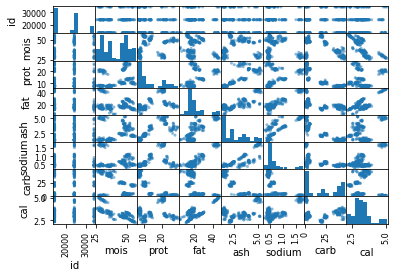

In [66]:
pd.plotting.scatter_matrix(pizza)

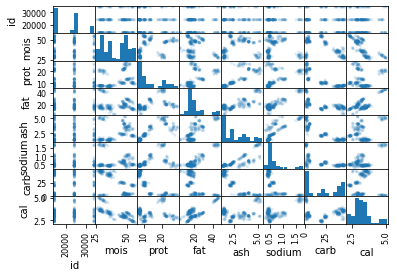

In [64]:
pd.plotting.scatter_matrix(pizza , alpha=0.15);

#####ตัด Dimension ที่เป็นตัวอักษรออกไป ให้เหลือเฉพาะข้อมูลที่เป็นตัวเลข

In [78]:
pizza.iloc[:,2:]    

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


#### นำมาเท่ากับตัวแปรตัวใหม่เพื่อจะใช้ต่อได้

In [80]:
newpizza = pizza.iloc[:,2:]    
newpizza.head()

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67


####ตรวจสอบว่าระหว่าง Column มี Correlation กันมากน้อยแค่ไหนด้วย numpy

In [85]:
corr = np.corrcoef(newpizza.to_numpy().T)

In [86]:
corr.shape

(7, 7)

In [87]:
corr   #เป็นการดู correlation จุดที่ขึ้น 1 คือเป็นแบบข้อมูลตัวมันเองเทียบกับข้อมูลมันเอง ซึ่งมันก็คือข้อมูลของตัวมันเองอยู่แล้ว 

array([[ 1.        ,  0.36024768, -0.17131821,  0.26555552, -0.1022789 ,
        -0.59180165, -0.76444054],
       [ 0.36024768,  1.        ,  0.49800167,  0.8238437 ,  0.42912952,
        -0.85354226,  0.0702581 ],
       [-0.17131821,  0.49800167,  1.        ,  0.79163396,  0.93332522,
        -0.64023817,  0.7645671 ],
       [ 0.26555552,  0.8238437 ,  0.79163396,  1.        ,  0.80812215,
        -0.89898837,  0.32646845],
       [-0.1022789 ,  0.42912952,  0.93332522,  0.80812215,  1.        ,
        -0.62017634,  0.6719575 ],
       [-0.59180165, -0.85354226, -0.64023817, -0.89898837, -0.62017634,
         1.        , -0.02348458],
       [-0.76444054,  0.0702581 ,  0.7645671 ,  0.32646845,  0.6719575 ,
        -0.02348458,  1.        ]])

In [88]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} <=> column = {j} corrcoef = {corr[i,j]}')    
            #ไม่มี correlation ซ้ำกัน จึงไม่ต้องลบ data ที่มันซ้ำกันออก

####ตัด dimension ที่ไม่ใช้ออก

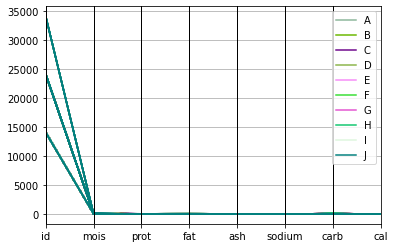

In [109]:
pd.plotting.parallel_coordinates(pizza,'brand')

In [124]:
pizza_dropped1 = pizza.drop(['brand','id'],axis=1)  
pizza_dropped1

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [125]:
pizza_dropped2 = pizza.drop(['id'],axis=1)  
pizza_dropped2

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,J,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,47.60,10.43,15.18,2.32,0.56,24.47,2.76


####กราฟ parallel coordinate

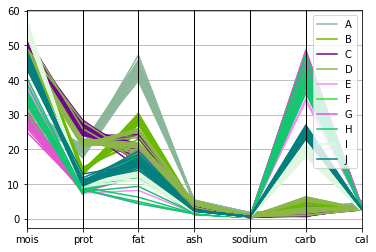

In [126]:
pd.plotting.parallel_coordinates(pizza_dropped2,'brand',cols=['mois','prot','fat','ash','sodium','carb','cal'])

####ทำ PCA เพื่อลดจำนวน Dimension ของข้อมูล

In [112]:
from sklearn.decomposition import PCA

In [113]:
pca = PCA(n_components=2)

In [114]:
new_pca = pca.fit_transform(pizza_dropped.to_numpy())

In [115]:
new_pca.shape  #มี 300 data 2 dimension

(300, 2)

In [116]:
new_pca   #แต่ละ data เหลือ 2 dimension

array([[-2.49517479e+01,  2.68116678e+01],
       [-2.46119758e+01,  2.56595634e+01],
       [-2.49384190e+01,  2.69305710e+01],
       [-2.43255609e+01,  2.35235671e+01],
       [-2.38660483e+01,  2.26528128e+01],
       [-2.42716473e+01,  2.25496261e+01],
       [-2.38806695e+01,  2.18852969e+01],
       [-2.23894923e+01,  2.39358506e+01],
       [-2.45074215e+01,  2.66033180e+01],
       [-2.50928469e+01,  2.71508163e+01],
       [-2.48185674e+01,  2.76159021e+01],
       [-2.39395254e+01,  2.75274080e+01],
       [-2.44496724e+01,  2.62221990e+01],
       [-2.28480039e+01,  2.27702098e+01],
       [-2.42812192e+01,  2.25656557e+01],
       [-2.38786302e+01,  2.39995991e+01],
       [-2.32390338e+01,  1.96576785e+01],
       [-2.36081213e+01,  1.88694931e+01],
       [-2.34833228e+01,  2.08403006e+01],
       [-2.30861647e+01,  2.25687679e+01],
       [-2.44317537e+01,  2.88343106e+01],
       [-2.39812139e+01,  2.72251577e+01],
       [-2.43513670e+01,  2.27327854e+01],
       [-2.

#### ดูว่ามีแบรนด์อะไรบ้าง

In [120]:
set(pizza['brand'])  

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

#### สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลข เพื่อจะได้ plot สีได้

In [121]:
brand_l = list(brand)  # แปลงเป็นlist
brand_l.sort()  # เรียงค่าจากน้อยไปมาก
color_list = {}
num = 0
for each_fg in brand_l:
    if each_fg not in color_list:
        color_list[each_fg] = num
        num += 1

In [122]:
color_list

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9}

In [127]:
pizza_dropped2 = pizza_dropped2.replace(color_list)
pizza_dropped2

,brand,mois,prot,fat,ash,sodium,carb,cal
0,0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,0,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,0,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,0,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,0,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,9,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,9,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,9,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,9,47.60,10.43,15.18,2.32,0.56,24.47,2.76


#### Plot กราฟ Scatter

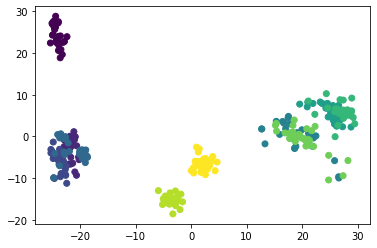

In [132]:
 plt.scatter(new_pca[:,0],new_pca[:,1],c = pizza_dropped2['brand'])  #จากกราฟ Data ทับกัน

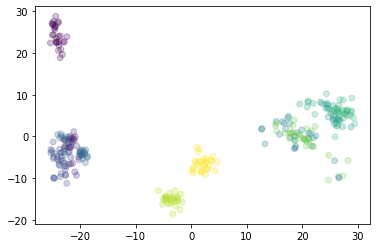

In [134]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = pizza_dropped2['brand'],alpha=0.25) #เนื่องจากกราฟด้านบน data มันทับกัน จึงแก้ด้วยการทำให้จุดของ data มีความโปร่งใสขึ้นด้วยคำสั่ง alpha=

####เปรียบเทียบแบรนด์  F และ H

In [135]:
FH = pizza_dropped2[(pizza_dropped2['brand']==5) | (pizza_dropped2['brand']==7)]
FH

,brand,mois,prot,fat,ash,sodium,carb,cal
147,5,28.03,7.65,18.39,1.53,0.49,44.40,3.74
148,5,30.09,7.99,15.16,1.46,0.48,45.30,3.50
149,5,29.79,8.17,14.35,1.49,0.46,46.20,3.46
150,5,30.07,8.02,20.39,1.45,0.45,40.07,3.76
151,5,28.46,7.70,18.88,1.40,0.43,43.56,3.75
...,...,...,...,...,...,...,...,...
234,7,36.32,8.06,12.54,1.35,0.43,41.73,3.12
235,7,34.61,7.17,17.88,1.29,0.40,39.05,3.46
236,7,36.67,7.81,9.34,1.64,0.44,44.54,2.93
237,7,35.94,7.97,13.50,1.45,0.42,41.14,3.18


In [136]:
pca = PCA(n_components=2)
new_pca2 = pca.fit_transform(FH.iloc[:,1:].to_numpy())

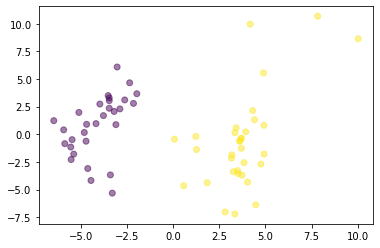

In [138]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = FH['brand'],alpha=0.5)  #จากกราฟตัวนี้เราไม่ทราบว่าตัวไหนคือแบรนด์ F ตัวไหนคือแบรนด์ H 

In [139]:
F_pca = pca.transform(FH[FH['brand']==5].iloc[:,1:].to_numpy())
H_pca = pca.transform(FH[FH['brand']==7].iloc[:,1:].to_numpy())

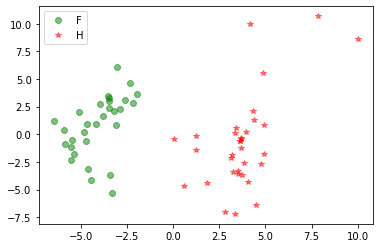

In [142]:
plt.plot(F_pca[:,0],F_pca[:,1],'og',alpha=0.5,label='F')   #ก็จะทราบว่าแบรนด์ F คือสีเขียวและสีแดงคือแบรนด์ H
plt.plot(H_pca[:,0],H_pca[:,1],'*r',alpha=0.5,label='H')
plt.legend()                         #แบรนด์H จะมีการกระจายตัวมากกว่าแบรนด์ F

####Principle components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน

In [143]:
pca.explained_variance_ratio_  #dimension แรกอธิบายข้อมูลได้ 56.65% dimension 2 อธิบายได้ 42.94%   การplot อธิบายข้อมูลได้ 99.59%

array([0.56665732, 0.42941719])

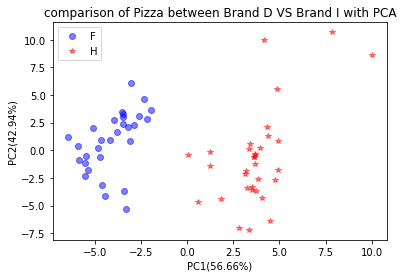

In [144]:
plt.plot(F_pca[:,0],F_pca[:,1],'ob',alpha=0.5,label='F')
plt.plot(H_pca[:,0],H_pca[:,1],'*r',alpha=0.5,label='H')
plt.legend()
plt.title('comparison of Pizza between Brand D VS Brand I with PCA')
plt.xlabel('PC1(56.66%)')
plt.ylabel('PC2(42.94%)');     #PC1 อธิบายข้อมูลได้ 56.65% และ PC2 อธิบายได้ 42.94%   การplot อธิบายข้อมูลได้ 99.59%

##nndb_flat